# Data loading

In [44]:
file = open('A1.txt', 'r') 
A1 = file.readlines()[0]

file = open('Asource.txt', 'r') 
A0 = file.readlines()[0]

file = open('B1.txt', 'r') 
B1 = file.readlines()[0]

file = open('Bsource.txt', 'r') 
B0 = file.readlines()[0]

file = open('C1.txt', 'r') 
C1 = file.readlines()[0]

file = open('Csource.txt', 'r') 
C0 = file.readlines()[0]

file = open('D1.txt', 'r') 
D1 = file.readlines()[0]

file = open('D2.txt', 'r') 
D2 = file.readlines()[0]

file = open('Dsource.txt', 'r') 
D0 = file.readlines()[0]

In [45]:
C0

'Descartes has been heralded as the first modern philosopher. He is famous for having made an important connection between geometry and algebra, which allowed for the solving of geometrical problems by way of algebraic equations. He is also famous for having promoted a new conception of matter, which allowed for the accounting of physical phenomena by way of mechanical explanations. However, he is most famous for having written a relatively short work, Meditationes de Prima Philosophia (Meditations On First Philosophy), published in 1641, in which he provides a philosophical groundwork for the possibility of the sciences. (Smith, 2007).\n'

In [46]:
alldata = [A0, A1, B0, B1, C0, C1, D0, D1, D2]

# Data preprocessing

In [47]:
#TODO: Compute tf-idf for all documents
from sklearn.feature_extraction.text import TfidfVectorizer


tfvect = TfidfVectorizer()

tfvect.fit(alldata)

tfidf = tfvect.transform(alldata)

TFIDFA = tfvect.transform([A0, A1]).toarray()
TFIDFB = tfvect.transform([B0, B1]).toarray()
TFIDFC = tfvect.transform([C0, C1]).toarray()
TFIDFD = tfvect.transform([D0, D1, D2]).toarray()

# Similarity computation

In [48]:
#TODO: pair-wise similarity
from sklearn.metrics.pairwise import cosine_similarity

similarityAA = cosine_similarity(TFIDFA, TFIDFA)
similarityBB = cosine_similarity(TFIDFB, TFIDFB)
similarityCC = cosine_similarity(TFIDFC, TFIDFC)
similarityDD = cosine_similarity(TFIDFD, TFIDFD)

similarityAll = cosine_similarity(tfidf, tfidf)

In [49]:
similarityAA

array([[1.        , 0.81898863],
       [0.81898863, 1.        ]])

In [50]:
similarityBB

array([[1.        , 0.63747903],
       [0.63747903, 1.        ]])

In [51]:
similarityCC

array([[1.        , 0.85723864],
       [0.85723864, 1.        ]])

In [52]:
similarityDD

array([[1.        , 0.91153882, 0.45775827],
       [0.91153882, 1.        , 0.46409641],
       [0.45775827, 0.46409641, 1.        ]])

In [53]:
similarityAll

array([[1.        , 0.81898863, 0.10748497, 0.12736224, 0.24491604,
        0.29501242, 0.2530779 , 0.21594796, 0.18585492],
       [0.81898863, 1.        , 0.10940658, 0.12644471, 0.21239125,
        0.25583485, 0.214717  , 0.18046478, 0.16807197],
       [0.10748497, 0.10940658, 1.        , 0.63747903, 0.08804551,
        0.09372089, 0.08509508, 0.07994656, 0.10627147],
       [0.12736224, 0.12644471, 0.63747903, 1.        , 0.08730757,
        0.08893992, 0.12527568, 0.12146166, 0.12910021],
       [0.24491604, 0.21239125, 0.08804551, 0.08730757, 1.        ,
        0.85723864, 0.20151171, 0.16298738, 0.14447728],
       [0.29501242, 0.25583485, 0.09372089, 0.08893992, 0.85723864,
        1.        , 0.22326634, 0.18176114, 0.1558733 ],
       [0.2530779 , 0.214717  , 0.08509508, 0.12527568, 0.20151171,
        0.22326634, 1.        , 0.91153882, 0.45775827],
       [0.21594796, 0.18046478, 0.07994656, 0.12146166, 0.16298738,
        0.18176114, 0.91153882, 1.        , 0.46409641],


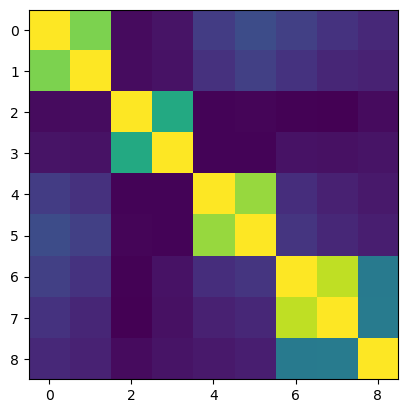

In [54]:
import matplotlib.pyplot as plt

#TODO: show pair-wise similarity
import matplotlib.pyplot as plt

plt.imshow(similarityAll)
plt.show()

# Threshold definition

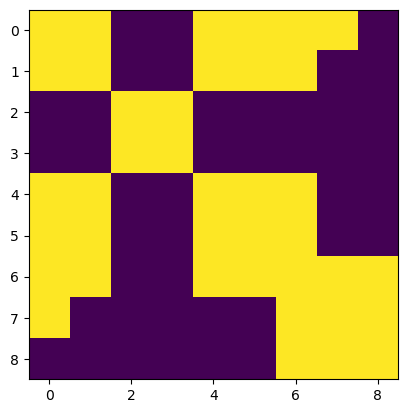

In [55]:
pred_plagiarism = similarityAll>0.2

#TODO: show pair-wise similarity
threshold = 0.2

pred_plagiarism = similarityAll > threshold
plt.imshow(pred_plagiarism)
plt.show()

# Perf estimation

In [56]:
import numpy as np
real_plagiarism = np.zeros((9,9))

# TODO: build the true labels matrix (to do automatically would be better...)       
# Define the true labels for the A documents
real_plagiarism[0,1] = 1

# Define the true labels for the B documents
real_plagiarism[2,3] = 1

# Define the true labels for the C documents
real_plagiarism[4,5] = 1

# Define the true labels for the D documents
real_plagiarism[6,7] = 1
real_plagiarism[6,8] = 1
real_plagiarism[7,8] = 1

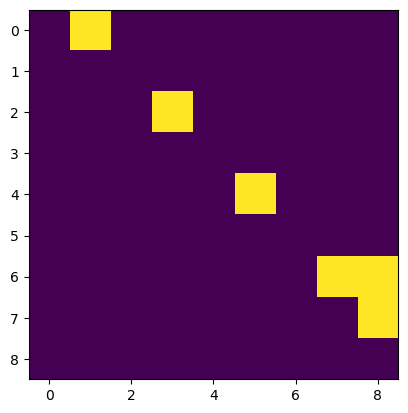

In [57]:
import matplotlib.pyplot as plt
plt.imshow(real_plagiarism)
plt.show()

In [58]:
from sklearn.metrics import accuracy_score

#TODO: compute the accuracy score based on true matrices
accuracy = accuracy_score(real_plagiarism.flatten(), pred_plagiarism.flatten())

print("The accuracy is: %.2f" % accuracy)

The accuracy is: 0.59
